In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# folderPath = "/content/drive/Othercomputers/z590/Colab Notebooks/Computer Vision/Project1"
folderPath = "."

In [2]:
import os
import glob
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalMaxPooling2D, BatchNormalization, InputLayer
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib

from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import svm, metrics
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
seed = 7

In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

1.A.

In [4]:
zipfile_path = os.path.join(folderPath, "plant-seedlings-classification")
zipfile_path

'.\\plant-seedlings-classification'

In [5]:
from zipfile import ZipFile
with ZipFile(zipfile_path + '.zip', 'r') as z:
  print("Zip already extracted") if os.path.exists(zipfile_path) else z.extractall(path=folderPath)

Zip already extracted


1.B.

In [6]:
train_folder_path = "plant-seedlings-classification/train"
print(train_folder_path)
full_train_path = os.path.join(folderPath , train_folder_path)
print(full_train_path)

plant-seedlings-classification/train
.\plant-seedlings-classification/train


In [7]:
full_image_folder_paths = glob.glob(os.path.join(full_train_path , "*"))
full_image_folder_paths

['.\\plant-seedlings-classification/train\\Black-grass',
 '.\\plant-seedlings-classification/train\\Charlock',
 '.\\plant-seedlings-classification/train\\Cleavers',
 '.\\plant-seedlings-classification/train\\Common Chickweed',
 '.\\plant-seedlings-classification/train\\Common wheat',
 '.\\plant-seedlings-classification/train\\Fat Hen',
 '.\\plant-seedlings-classification/train\\Loose Silky-bent',
 '.\\plant-seedlings-classification/train\\Maize',
 '.\\plant-seedlings-classification/train\\Scentless Mayweed',
 '.\\plant-seedlings-classification/train\\Shepherds Purse',
 '.\\plant-seedlings-classification/train\\Small-flowered Cranesbill',
 '.\\plant-seedlings-classification/train\\Sugar beet']

In [8]:
df = pd.DataFrame(columns=('name','species','image'))
for idx, image_folder_path in enumerate(full_image_folder_paths):
    label = re.split(r'[/\\]', image_folder_path)[-1]
    image_paths = glob.glob(image_folder_path + "/*")
    for image_path in image_paths:
        imgcv2 = cv2.imread(os.path.join(image_path), cv2.COLOR_BGR2RGB)
        df.loc[len(df)] = [re.split(r'[/\\]', image_path)[-1], label, imgcv2]
df.head()

name      species  \
0  0050f38b3.png  Black-grass   
1  0183fdf68.png  Black-grass   
2  0260cffa8.png  Black-grass   
3  05eedce4d.png  Black-grass   
4  075d004bc.png  Black-grass   

                                               image  
0  [[[27, 50, 80], [18, 42, 71], [36, 57, 83], [4...  
1  [[[37, 43, 55], [37, 43, 54], [40, 46, 57], [4...  
2  [[[24, 32, 45], [21, 30, 44], [22, 30, 45], [2...  
3  [[[51, 84, 108], [56, 89, 112], [54, 88, 110],...  
4  [[[165, 162, 162], [165, 161, 163], [160, 157,...

1.C.

In [9]:
image_col_name = 'image'
def n_random_image_species(n):
    perm = np.random.choice(len(df), size=n)

    for item in perm:
        plt.imshow(df[image_col_name][item])
        plt.axis("off")
        plt.show()
        print("Species: ", df['species'][item])
        print("shape: ", df[image_col_name][item].shape, '\n\n')

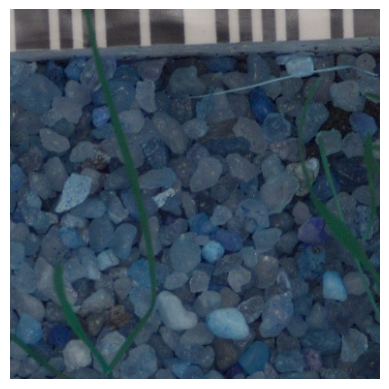

Species:  Loose Silky-bent
shape:  (382, 382, 3) 




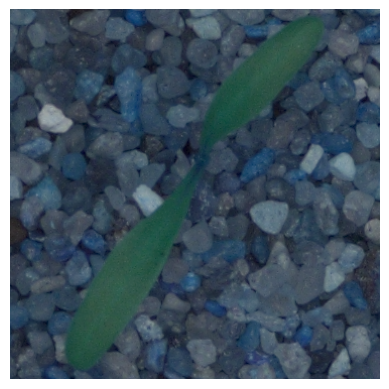

Species:  Sugar beet
shape:  (367, 367, 3) 




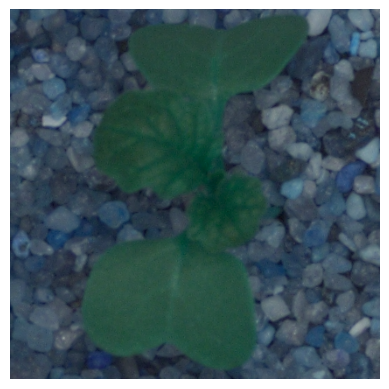

Species:  Charlock
shape:  (423, 423, 3) 




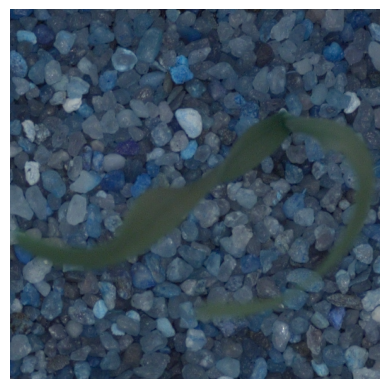

Species:  Common wheat
shape:  (523, 523, 3) 




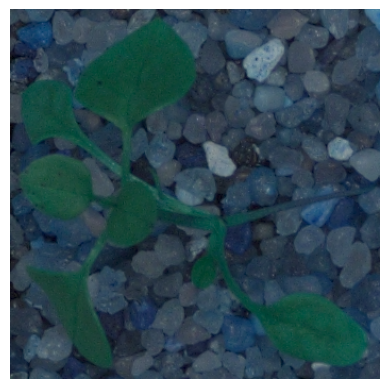

Species:  Common Chickweed
shape:  (348, 348, 3) 




In [10]:
n_random_image_species(5)

2.A. & 2.B.

In [11]:
x = df.image

In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df.species)
print(y.shape)
num_classes = len(np.unique(y))
num_classes

(4750,)


12

In [13]:
y = keras.utils.to_categorical(y, num_classes=None, dtype='int')

In [14]:
y.shape

(4750, 12)

2.C. & 2.D.

In [15]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [16]:
img_data = []
for idx, item in enumerate(x):
    img = item
    print(img.size)
    img = cv2.resize(img, (IMG_HEIGHT, IMG_WIDTH), interpolation=cv2.INTER_CUBIC)
    img = np.array(img)
    img = np.float32(img)
    img /= 255 # /= 255 for normalisation
    img_data.append(img)
df['image_resized'] = img_data

115248
451632
2354988
41067
665523
3460428
189003
10824300
845883
371712
9815256
845883
5290752
375948
1030188
6023667
369603
2770563
1701027
1190700
1516563
7404123
18362028
1267500
783363
183027
61347
36300
10045146
406272
1037232
2679075
814323
1470000
657072
1232643
1407675
3460428
25947
6220800
248832
1090827
1920000
86700
54675
25947
1090827
1611867
480000
86700
3964050
2650800
3269808
662700
415152
823728
1221132
3276075
114075
1232643
1387200
1062075
95052
3276075
34347
111747
15987
73008
2958147
1825200
415152
2430000
662700
87723
554700
1090827
56307
26508
2344368
685452
1407675
3905643
1428300
2462508
6177675
3182700
369603
1825200
412923
2291628
1555200
79707
371712
21386700
68403
18922896
371712
756012
18164640
451632
43200
371712
43923
957675
1760268
23232
1132830
451632
264627
6220800
371712
1090827
1470000
38307
1326675
1555200
34992
3244800
845883
388608
685452
297675
5290752
2679075
1920000
7873200
18642960
1825200
35643
1407675
1149483
2898867
599427
484812
665523
43

In [17]:
img_data[0].shape

(128, 128, 3)

In [18]:
x = np.expand_dims(img_data, axis=4)
x.shape

(4750, 128, 128, 3, 1)

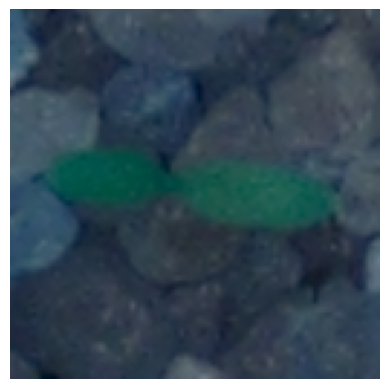

Species:  Common Chickweed
shape:  (128, 128, 3) 




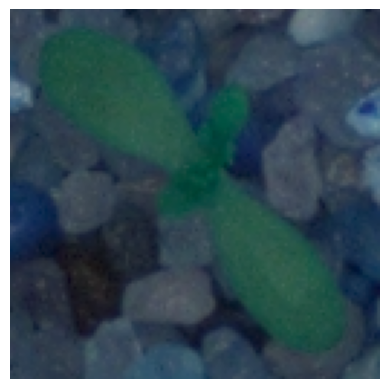

Species:  Scentless Mayweed
shape:  (128, 128, 3) 




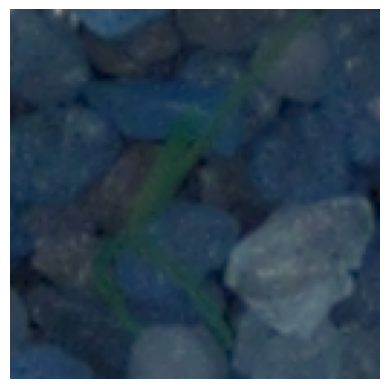

Species:  Loose Silky-bent
shape:  (128, 128, 3) 




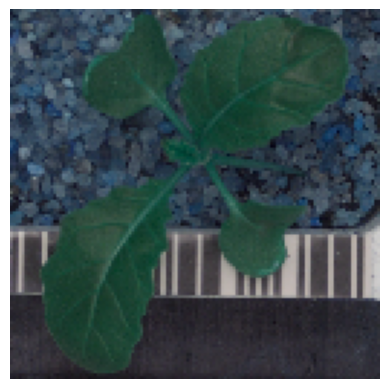

Species:  Charlock
shape:  (128, 128, 3) 




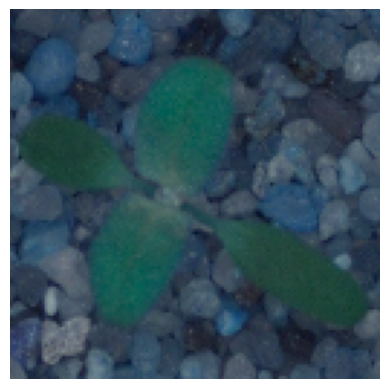

Species:  Fat Hen
shape:  (128, 128, 3) 




In [19]:
image_col_name = 'image_resized'
n_random_image_species(5)

All images are of unified shape and normalized now

we are keeping data in x and y variable for training

3.A.

Splitting data into training and testing set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

Creating validation set

In [21]:
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [22]:
print("Shapes of Train sets are: ", X_train.shape)
print("Shapes of Test sets are: ", X_test.shape)
print("Shapes of Validation sets are: ", X_val.shape)

Shapes of Train sets are:  (3325, 128, 128, 3, 1)
Shapes of Test sets are:  (712, 128, 128, 3, 1)
Shapes of Validation sets are:  (713, 128, 128, 3, 1)


3.B.

Creating CNN architecture for model

In [23]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', batch_input_shape = (batch_size, height, width, num_channels)))


  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.4))



  model.add(GlobalMaxPooling2D())
  model.add(Dense(128, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))

  optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  model.summary()
  return model

In [24]:
cnn = cnn_model(IMG_HEIGHT, IMG_WIDTH, 3, num_classes)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

3.C.

In [25]:
num_classes

12

In [26]:
batch_size = 38
history = cnn.fit(X_train, 
                  y_train, 
                  epochs = 50, 
                  validation_data = (X_val, y_val),
                  batch_size = batch_size)

Epoch 1/50
88/88 [==============================] - 27s 135ms/step - loss: 2.4418 - accuracy: 0.1362 - val_loss: 2.4400 - val_accuracy: 0.1346
Epoch 2/50
88/88 [==============================] - 7s 74ms/step - loss: 2.2783 - accuracy: 0.2415 - val_loss: 2.2139 - val_accuracy: 0.3001
Epoch 3/50
88/88 [==============================] - 6s 73ms/step - loss: 2.0919 - accuracy: 0.2869 - val_loss: 2.0250 - val_accuracy: 0.3478
Epoch 4/50
88/88 [==============================] - 7s 79ms/step - loss: 2.0130 - accuracy: 0.3134 - val_loss: 1.9559 - val_accuracy: 0.3212
Epoch 5/50
88/88 [==============================] - 7s 74ms/step - loss: 1.9057 - accuracy: 0.3510 - val_loss: 1.8526 - val_accuracy: 0.4418
Epoch 6/50
88/88 [==============================] - 7s 74ms/step - loss: 1.7663 - accuracy: 0.3994 - val_loss: 1.6534 - val_accuracy: 0.5021
Epoch 7/50
88/88 [==============================] - 6s 73ms/step - loss: 1.6543 - accuracy: 0.4382 - val_loss: 1.5526 - val_accuracy: 0.5189
Epoch 8/50


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
# PREDICTIONS
y_pred = cnn.predict(X_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

23/23 [==============================] - 1s 25ms/step
[[14  0  0  0  2  0 23  0  1  0  0  0]
 [ 0 52  8  0  0  0  0  0  0  3  2  0]
 [ 0  0 29  0  0  0  0  0  3  2  0  0]
 [ 0  0  0 63  0  0  0  0  3  5  0  0]
 [ 2  0  0  0 37  0  1  0  2  0  0  0]
 [ 0  1  2  0  0 73  1  0  0  2  2  0]
 [11  0  0  1  0  3 81  0  0  0  0  0]
 [ 0  2  0  0  0  0  0 33  5  0  0  0]
 [ 0  0  0  0  0  0  0  0 71  0  0  0]
 [ 0  0  0  0  0  0  0  0  3 31  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 82  0]
 [ 0  1  1  0  0  1  0  0  4  2  0 47]]


In [29]:
cnn_loss, cnn_accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', cnn_loss)
print('Test accuracy:', cnn_accuracy)

23/23 [==============================] - 0s 14ms/step - loss: 0.3680 - accuracy: 0.8610
Test loss: 0.3679617643356323
Test accuracy: 0.8609550595283508


3.D.

In [30]:
perm = np.random.choice(len(df))
perm

1586

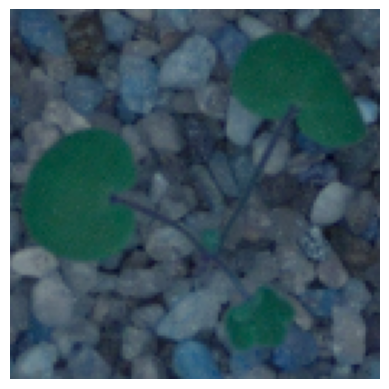

'plant-seedlings-classification/train\\Small-flowered Cranesbill\\1b71148aa.png'

In [31]:
random_img_prediction = []
perm = np.random.choice(len(df))
plt.imshow(df[image_col_name][perm])
plt.axis("off")
plt.show()
random_image_path = os.path.join(os.path.join(train_folder_path , df['species'][perm]), df['name'][perm])
random_image_path

In [32]:
img_pred = cv2.imread(random_image_path)
img_pred_resize = cv2.resize(img_pred,(IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_CUBIC)
img_predict_plant = np.expand_dims(img_pred_resize, axis=0)
cnn_predict_image = np.argmax(cnn.predict(img_predict_plant))
print('The predicted plant is with label:', cnn_predict_image)


1/1 [==============================] - 0s 303ms/step
The predicted plant is with label: 10


# PART B

1.A.

In [34]:
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [35]:
import random
random.seed(0)

In [36]:
x, y = oxflower17.load_data()

1.B. & 1.C.

In [37]:
print("shape of x ", x.shape)

shape of x  (1360, 224, 224, 3)


There are a total of 1360 images of size 224, 224, 3

In [38]:
print("shape of y ", y.shape)

shape of y  (1360,)


Label :  0 -> number of images :  80
Label :  1 -> number of images :  80
Label :  2 -> number of images :  80
Label :  3 -> number of images :  80
Label :  4 -> number of images :  80
Label :  5 -> number of images :  80
Label :  6 -> number of images :  80
Label :  7 -> number of images :  80
Label :  8 -> number of images :  80
Label :  9 -> number of images :  80
Label :  10 -> number of images :  80
Label :  11 -> number of images :  80
Label :  12 -> number of images :  80
Label :  13 -> number of images :  80
Label :  14 -> number of images :  80
Label :  15 -> number of images :  80
Label :  16 -> number of images :  80


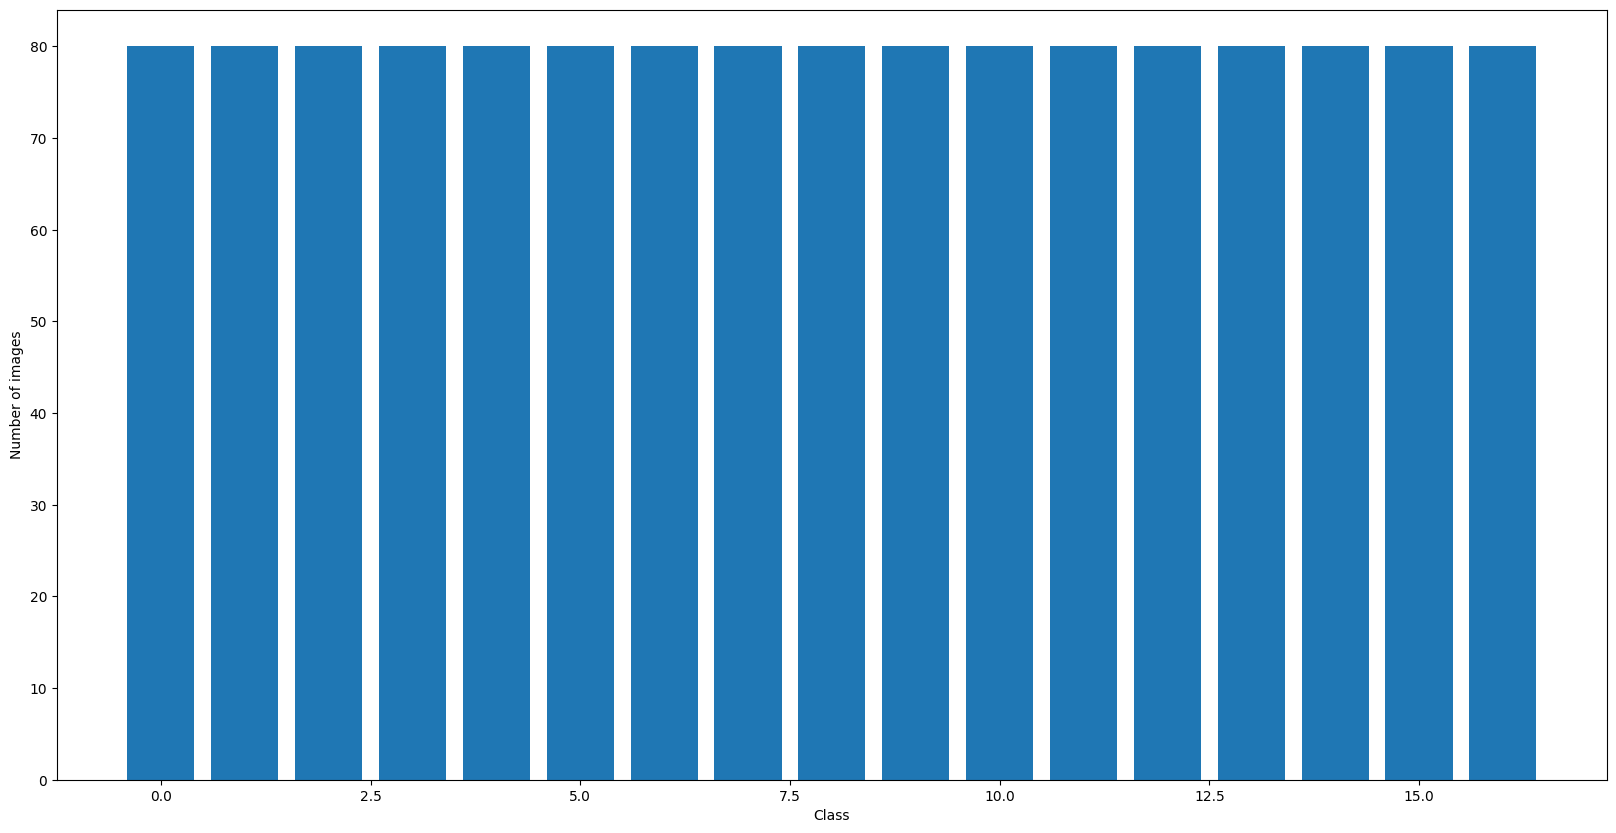

In [39]:
images_counts = []
labels = []
for label in set(y):
  images_counts.append(len(x[y == label]))
  labels.append(label)
  print("Label : ", label, "-> number of images : ", len(x[y == label]))

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, images_counts)
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()

All labels have 80 images each

2.A.

In [40]:
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

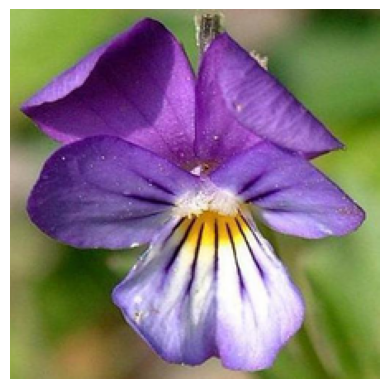

Label :  8 




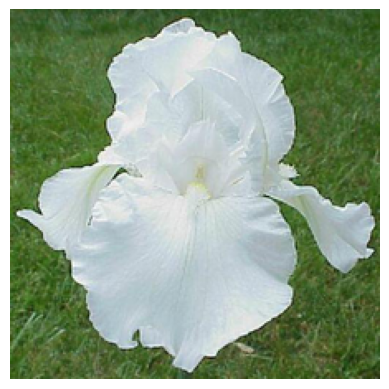

Label :  12 




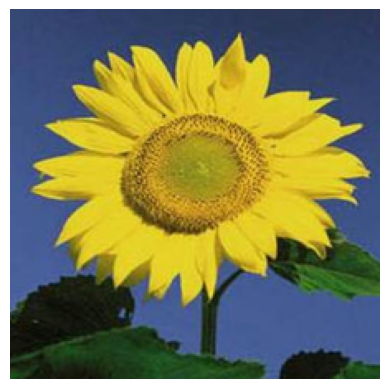

Label :  16 




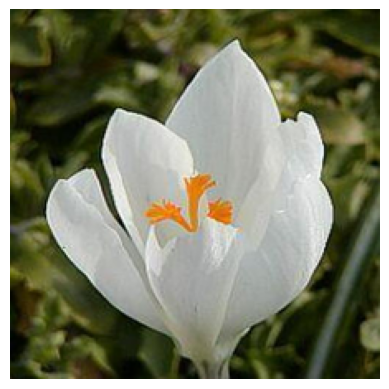

Label :  11 




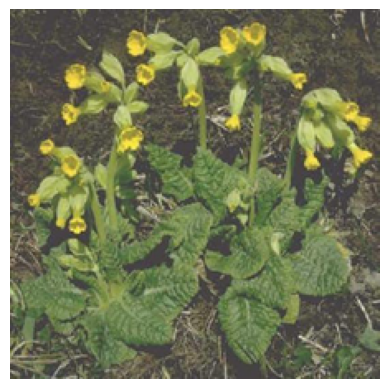

Label :  5 




In [41]:
def show_random_image(data, n):
    random_images = np.random.choice(len(x), size=5)

    for i in range(n):
        plt.imshow(x[i])
        plt.axis("off")
        plt.show()
        print("Label : ", y[i], "\n\n")
show_random_image(x, 5)

2.B.

(-0.5, 223.5, 223.5, -0.5)

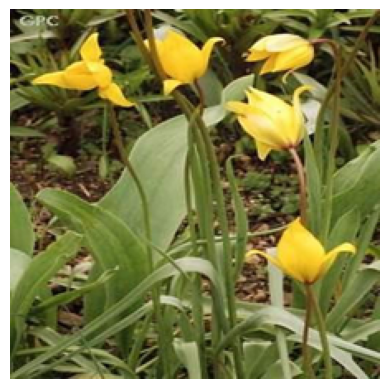

In [42]:
# selecting random image
random_image = x[np.random.choice(len(x))].copy()
plt.imshow(random_image, cmap='gray')
plt.axis("off")

2.C.

In [45]:
from skimage import color

(-0.5, 223.5, 223.5, -0.5)

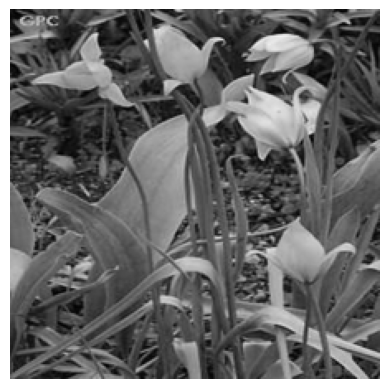

In [46]:
gray_img = random_image.copy()
for clr in range(random_image.shape[2]):
    gray_img[:,:,clr] = random_image.mean(axis=2)
plt.imshow(gray_img)
plt.axis("off")

2.D.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


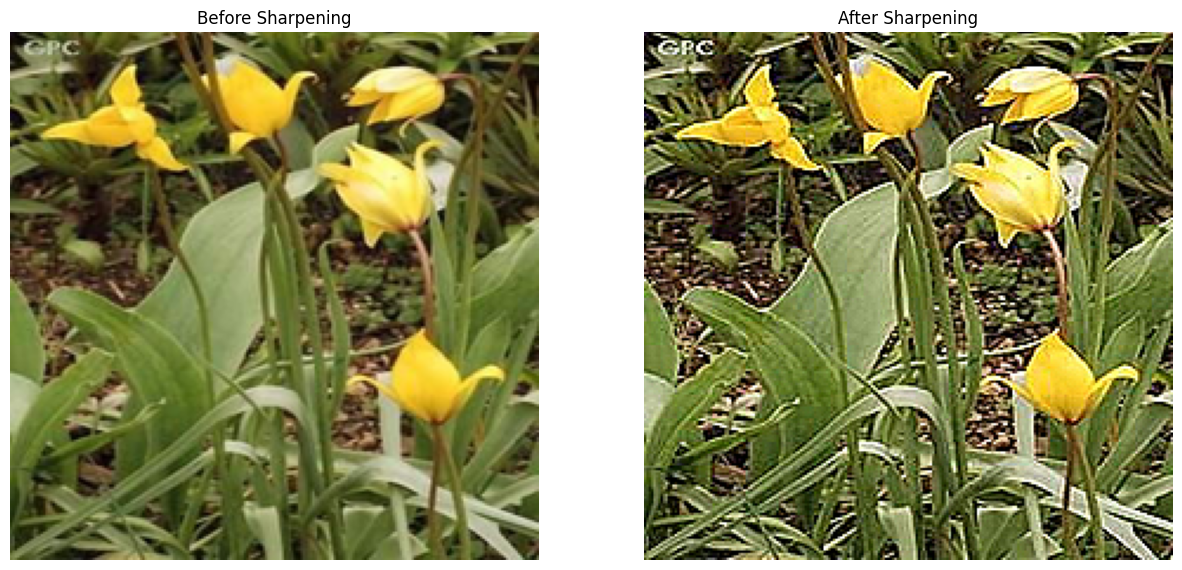

In [47]:
def sharpen_image(image):
    kernel = np.array([ [0, -1, 0],
                        [-1, 5,-1],
                        [0, -1, 0]])
    image_sharp = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    return image_sharp

sharp_img = sharpen_image(random_image)

f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(random_image)
axarr[0].set_title("Before Sharpening")
axarr[0].axis('off')
axarr[1].imshow(sharp_img)
axarr[1].set_title("After Sharpening")
axarr[1].axis('off')
plt.show()

2.E.

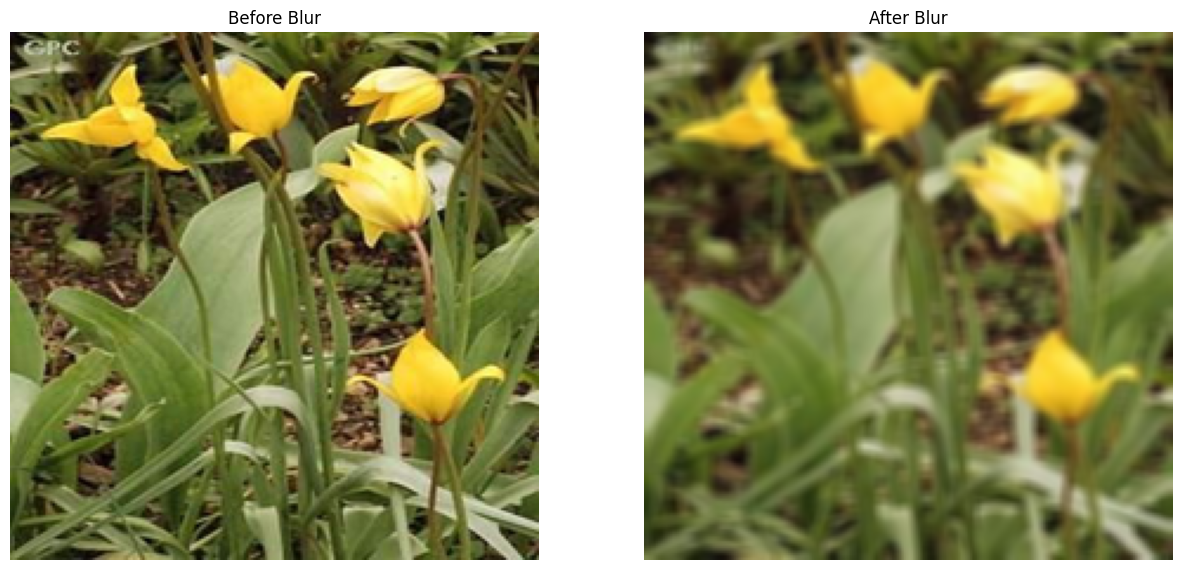

In [48]:
def blur_image(image):
    image_blur = cv2.blur(image,(5,5))
    return image_blur

blur_img = blur_image(random_image)

f, axarr = plt.subplots(1,2, figsize=(15,15))
axarr[0].imshow(random_image)
axarr[0].set_title("Before Blur")
axarr[0].axis('off')
axarr[1].imshow(blur_img)
axarr[1].set_title("After Blur")
axarr[1].axis('off')
plt.show()

2.F.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


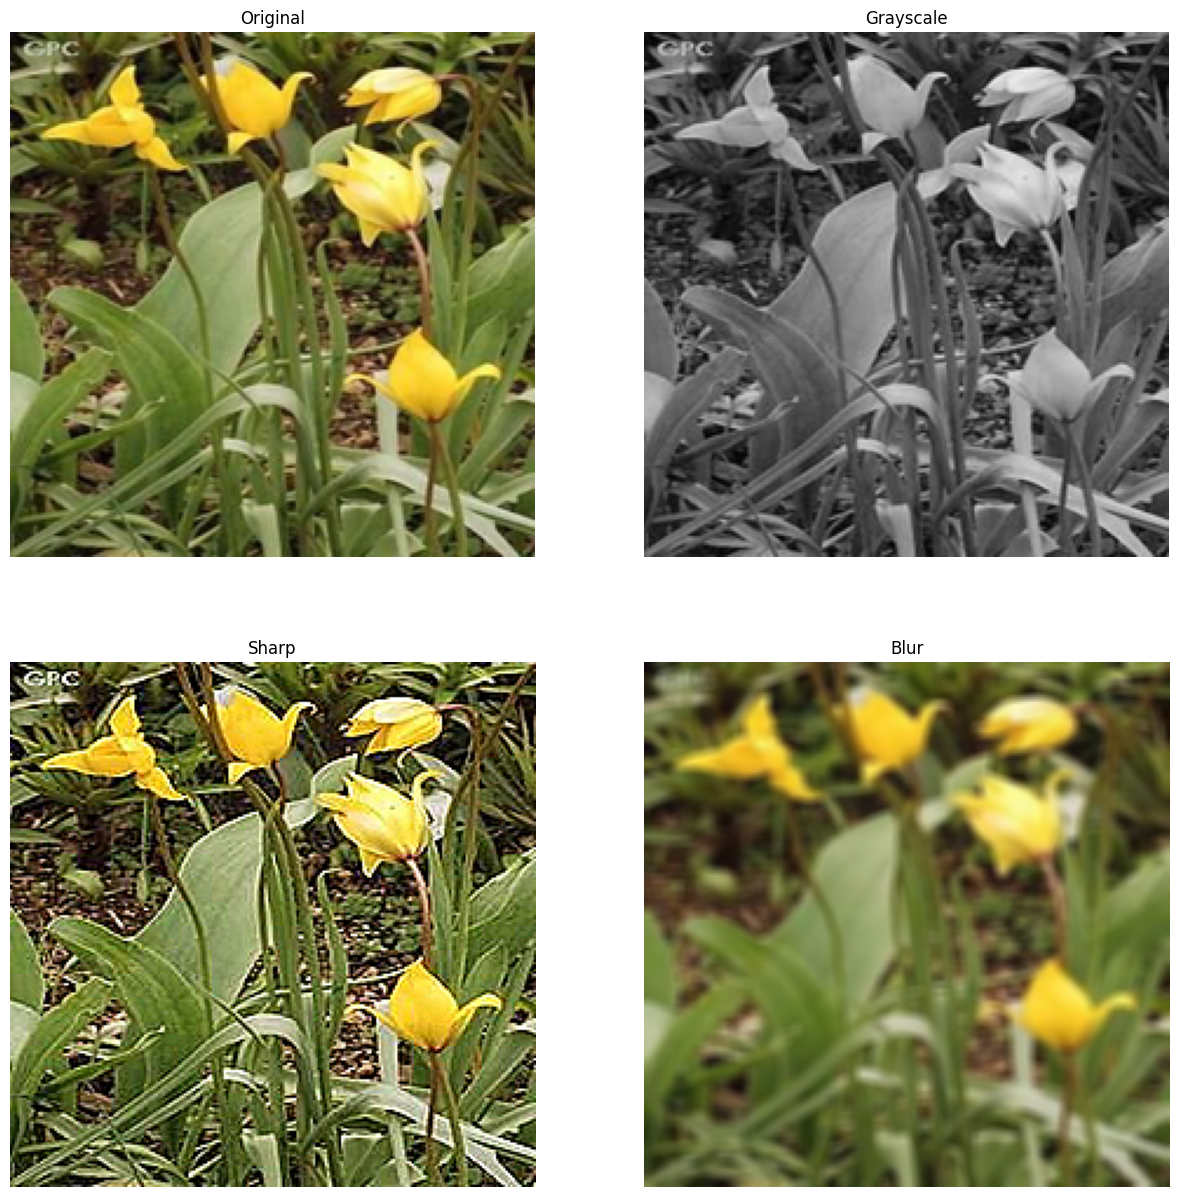

In [49]:
f, axarr = plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(random_image)
axarr[0,0].set_title("Original")
axarr[0,0].axis('off')
axarr[0,1].imshow(gray_img)
axarr[0,1].set_title("Grayscale")
axarr[0,1].axis('off')
axarr[1,0].imshow(sharp_img)
axarr[1,0].set_title("Sharp")
axarr[1,0].axis('off')
axarr[1,1].imshow(blur_img)
axarr[1,1].set_title("Blur")
axarr[1,1].axis('off')
plt.show()

3.A.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

In [51]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1088, 224, 224, 3) (272, 224, 224, 3) (1088,) (272,)


In [52]:
random_seed = 2
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [53]:
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)

(136, 224, 224, 3) (136, 224, 224, 3) (136,) (136,)


3.B.

Supervised Learning algorithm

In [54]:
def flatten(X):
  Xr, Xg, Xb = [],[],[]
  for idx, samples in enumerate(X):
    try:
        r, g, b = cv2.split(samples)
    except ValueError:
        continue
    Xr.append(r.flatten())
    Xg.append(g.flatten())
    Xb.append(b.flatten())
  Xr = np.array(Xr)
  Xg = np.array(Xg)
  Xb = np.array(Xb)
  return (Xr, Xg, Xb)

In [55]:
X_train_r, X_train_g, X_train_b = flatten(X_train)
X_test_r, X_test_g, X_test_b = flatten(X_test)
X_val_r, X_val_g, X_val_b = flatten(X_val)

In [56]:
X_train_r.shape, X_train_g.shape, X_train_b.shape,
X_test_r.shape, X_test_g.shape, X_test_b.shape,
X_val_r.shape, X_val_g.shape, X_val_b.shape

((136, 50176), (136, 50176), (136, 50176))

In [57]:
n_components = 100
X_train_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_r)
X_train_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_g)
X_train_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train_b)

X_test_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_r)
X_test_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_g)
X_test_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_test_b)

X_val_pca_r = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_r)
X_val_pca_g = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_g)
X_val_pca_b = RandomizedPCA(n_components=n_components, whiten=True).fit(X_val_b)

In [58]:
Xr_train_pca = X_train_pca_r.transform(X_train_r)
Xg_train_pca = X_train_pca_g.transform(X_train_g)
Xb_train_pca = X_train_pca_b.transform(X_train_b)

Xr_test_pca = X_test_pca_r.transform(X_test_r)
Xg_test_pca = X_test_pca_g.transform(X_test_g)
Xb_test_pca = X_test_pca_b.transform(X_test_b)

Xr_val_pca = X_val_pca_r.transform(X_val_r)
Xg_val_pca = X_val_pca_g.transform(X_val_g)
Xb_val_pca = X_val_pca_b.transform(X_val_b)

In [59]:
X_train_pca_r.explained_variance_ratio_.sum(), X_train_pca_g.explained_variance_ratio_.sum(), X_train_pca_b.explained_variance_ratio_.sum(),
X_test_pca_r.explained_variance_ratio_.sum(), X_test_pca_g.explained_variance_ratio_.sum(), X_test_pca_b.explained_variance_ratio_.sum(),
X_val_pca_r.explained_variance_ratio_.sum(), X_val_pca_g.explained_variance_ratio_.sum(), X_val_pca_b.explained_variance_ratio_.sum()

(0.9531745, 0.9500649, 0.967876)

In [60]:
X_train_pca = np.concatenate([Xr_train_pca,Xg_train_pca,Xb_train_pca], axis=1)
X_test_pca = np.concatenate([Xr_test_pca,Xg_test_pca,Xb_test_pca], axis=1)
X_val_pca = np.concatenate([Xr_val_pca,Xg_val_pca,Xb_val_pca], axis=1)


In [61]:
X_train_pca.shape, y_train.shape,
X_test_pca.shape, y_test.shape,
X_val_pca.shape, y_val.shape

((136, 300), (136,))

In [62]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = SVC()
clf = GridSearchCV(svc, param_grid, verbose=10, n_jobs=-1)
clf.fit(X_train_pca, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             verbose=10)

In [63]:
y_pred = clf.predict(X_test_pca)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
print("SVM accuracy : ", svm_accuracy)

SVM accuracy :  0.10294117647058823


Prediction with SVM

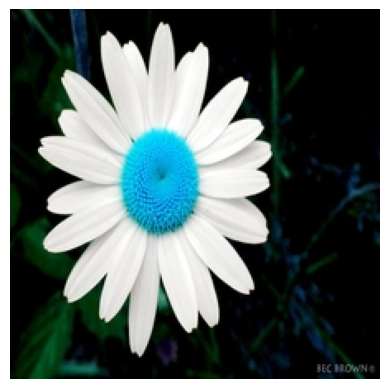

In [64]:
img_pred_flower = cv2.imread(os.path.join(folderPath, 'Prediction.jpg'))
img_pred_resize = cv2.resize(img_pred_flower, (224, 224), interpolation = cv2.INTER_CUBIC)
plt.imshow(img_pred_resize)
plt.axis('off')
img_prediction = np.expand_dims(img_pred_resize, axis=0)

In [65]:
pred_img = np.squeeze(img_prediction, axis=0)
X_pred_r, X_pred_g, X_pred_b = cv2.split(pred_img)

In [66]:
print(f"The shape of image to be predicted is:'{img_pred_flower.shape}'")
print(f"The shape of image to be predicted after expanding the dimensions is:'{img_prediction.shape}'")

The shape of image to be predicted is:'(224, 224, 3)'
The shape of image to be predicted after expanding the dimensions is:'(1, 224, 224, 3)'


In [67]:
X_pred_pca_r = X_train_pca_r.transform(np.expand_dims(X_pred_r.flatten(), axis=0))
X_pred_pca_g = X_train_pca_g.transform(np.expand_dims(X_pred_g.flatten(), axis=0))
X_pred_pca_b = X_train_pca_b.transform(np.expand_dims(X_pred_b.flatten(), axis=0))

X_pred_pca = np.concatenate([X_pred_pca_r,X_pred_pca_g,X_pred_pca_b], axis=1)

In [68]:
pred_svm = clf.predict(X_pred_pca)[0]
print(f"The predicted label is:'{pred_svm}'")

The predicted label is:'1'


In [69]:
model_performance_b = pd.DataFrame(columns=['Model', 'Accuracy', 'Loss','Predicted Class'])

In [70]:
model_performance_b = model_performance_b.append({'Model':'SVM',
                                              'Accuracy': svm_accuracy,
                                              'Loss': 'NA',
                                              'Predicted Class': pred_svm                                      
                                              }, ignore_index=True)

model_performance_b

Model  Accuracy Loss Predicted Class
0   SVM  0.102941   NA               1

3.C.

In [71]:
num_classes = len(np.unique(y))
num_classes

17

In [72]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

In [73]:
enc = LabelBinarizer()
y2 = enc.fit_transform(y)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.2, random_state=50)

In [75]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1088, 224, 224, 3) (272, 224, 224, 3) (1088, 17) (272, 17)


In [76]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [77]:
print(X_test.shape, X_val.shape, y_test.shape, y_val.shape)

(136, 224, 224, 3) (136, 224, 224, 3) (136, 17) (136, 17)


In [78]:
def nn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  model = Sequential()

  model.add(InputLayer(input_shape=(height, width, num_channels)))

  model.add(Flatten())
  model.add(BatchNormalization())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))

  model.add(BatchNormalization())
  model.add(Dense(num_classes, activation = "softmax"))
  opt = tf.keras.optimizers.Adam(lr=0.000001)
  model.compile(optimizer = opt, loss = loss, metrics = metrics)

  model.summary()
  return model

In [79]:
nn = nn_model(224, 224, 3, 17)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 batch_normalization (BatchN  (None, 150528)           602112    
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 1024)              154141696 
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                

In [80]:
nn_history = nn.fit(X_train, 
                  y_train, 
                  epochs = 50, 
                  validation_data = (X_val, y_val),
                  batch_size = batch_size)

Train on 1088 samples, validate on 136 samples
Epoch 1/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 3.3651 - acc: 0.0836 - val_loss: 2.7604 - val_acc: 0.1103
Epoch 2/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.9832 - acc: 0.1342 - val_loss: 2.6950 - val_acc: 0.1838
Epoch 3/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.6641 - acc: 0.2086 - val_loss: 2.6261 - val_acc: 0.1985
Epoch 4/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.4416 - acc: 0.2610 - val_loss: 2.5597 - val_acc: 0.1985
Epoch 5/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.2461 - acc: 0.3061 - val_loss: 2.4805 - val_acc: 0.2279
Epoch 6/50
1088/1088 [==============================] - 2s 1ms/sample - loss: 2.1027 - acc: 0.3373 - val_loss: 2.4046 - val_acc: 0.2574
Epoch 7/50
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.0035 - acc: 0.3594 - val_loss: 2.3526 - val_acc: 0.2426
E

In [81]:
nn_loss, nn_accuracy = nn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', nn_loss)
print('Test accuracy:', nn_accuracy)

Test loss: 1.6717330848469454
Test accuracy: 0.4852941


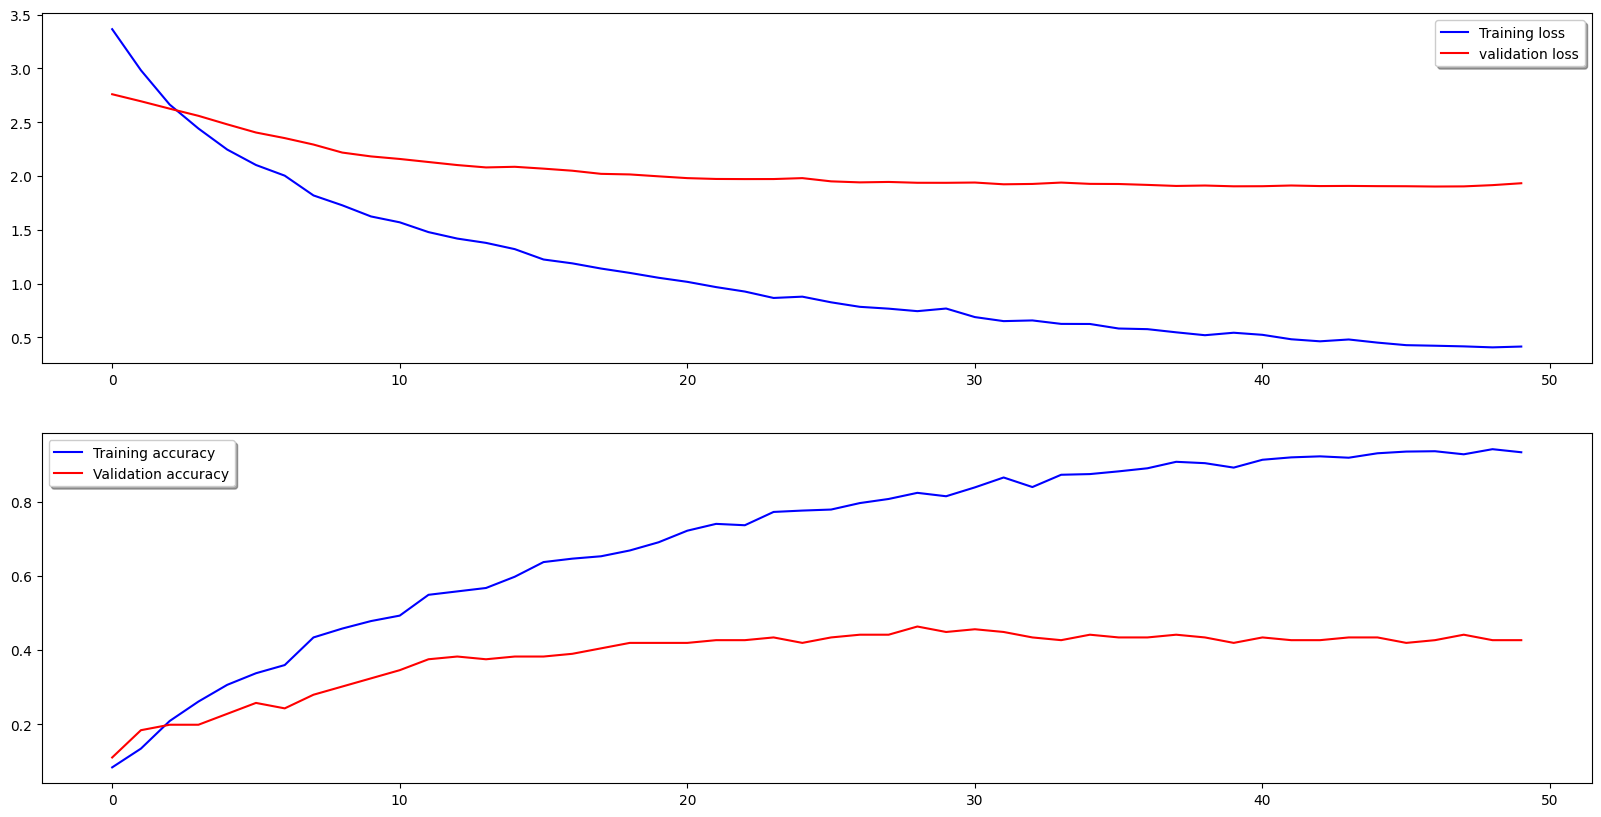

In [82]:
fig, ax = plt.subplots(2,1 , figsize=(20,10))
ax[0].plot(nn_history.history['loss'], color='b', label="Training loss")
ax[0].plot(nn_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(nn_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(nn_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [83]:
nn_predict = np.argmax(nn.predict(img_prediction))
print('The predicted flower is with label:', nn_predict)

The predicted flower is with label: 12


In [84]:
model_performance_b = model_performance_b.append({'Model':'NN',
                                              'Accuracy': nn_accuracy,
                                              'Loss': nn_loss,
                                              'Predicted Class': nn_predict                                      
                                              }, ignore_index=True)

model_performance_b

Model  Accuracy      Loss Predicted Class
0   SVM  0.102941        NA               1
1    NN  0.485294  1.671733              12

3.D.

In [85]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [87]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=random_seed)

In [88]:
def basic_cnn_model(height, width, num_channels, num_classes, loss='sparse_categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu', batch_input_shape = (batch_size,height, width, num_channels)))


  model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.4))



  model.add(GlobalMaxPooling2D())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))

  optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  model.summary()
  return model

In [89]:
basic_cnn = basic_cnn_model(224,224,3,17)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      2432      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      36928     
                                                      

In [90]:
basic_cnn_history = basic_cnn.fit(X_train, 
                      y_train, 
                      epochs = 50, 
                      validation_data = (X_val, y_val),
                      batch_size = batch_size)

Train on 1088 samples, validate on 136 samples
Epoch 1/50
1088/1088 [==============================] - 40s 37ms/sample - loss: 2.8398 - acc: 0.0533 - val_loss: 2.8342 - val_acc: 0.0441
Epoch 2/50
1088/1088 [==============================] - 13s 12ms/sample - loss: 2.8370 - acc: 0.0680 - val_loss: 2.8274 - val_acc: 0.1324
Epoch 3/50
1088/1088 [==============================] - 13s 12ms/sample - loss: 2.7899 - acc: 0.0956 - val_loss: 2.6933 - val_acc: 0.0735
Epoch 4/50
1088/1088 [==============================] - 11s 10ms/sample - loss: 2.7454 - acc: 0.1094 - val_loss: 2.6344 - val_acc: 0.1103
Epoch 5/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 2.7243 - acc: 0.1287 - val_loss: 2.5369 - val_acc: 0.1103
Epoch 6/50
1088/1088 [==============================] - 12s 11ms/sample - loss: 2.4723 - acc: 0.1406 - val_loss: 2.5585 - val_acc: 0.0956
Epoch 7/50
1088/1088 [==============================] - 16s 15ms/sample - loss: 2.4478 - acc: 0.1664 - val_loss: 2.2762 - val

In [91]:
basic_cnn_loss, basic_cnn_accuracy = basic_cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', basic_cnn_loss)
print('Test accuracy:', basic_cnn_accuracy)

Test loss: 1.0467098320231718
Test accuracy: 0.6397059


1.E.

In [92]:
basic_cnn_predict = np.argmax(basic_cnn.predict(img_prediction))
print('The predicted flower is with label:', basic_cnn_predict)

The predicted flower is with label: 2


In [93]:
model_performance_b = model_performance_b.append({'Model':'CNN',
                                              'Accuracy': basic_cnn_accuracy,
                                              'Loss': basic_cnn_loss,
                                              'Predicted Class': basic_cnn_predict                                      
                                              }, ignore_index=True)


In [94]:
model_performance_b

Model  Accuracy      Loss Predicted Class
0   SVM  0.102941        NA               1
1    NN  0.485294  1.671733              12
2   CNN  0.639706   1.04671               2

- Different model have pridected differently.
- CNN has the highest accuracy